## **About Dataset**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


## **Objectives**

- **Exploratory Data Analysis**: Sanity Check on the data, Statistic and Visualization 

- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.


## Attribute Information:

**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£).

**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal. The name of the country where a customer resides.

In [1]:
#importing necessary dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')
style.use(style='ggplot')

In [2]:
#Reading the data and displaying the first 5 rows

data = pd.read_csv(r'online_retail_II.csv')
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# **Exploratory Data Analysis(EDA)**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
# Checking for duplicates
data.duplicated().sum()

np.int64(34335)

In [5]:
# checking for missing data
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Text(0.5, 1.0, 'Missing Data')

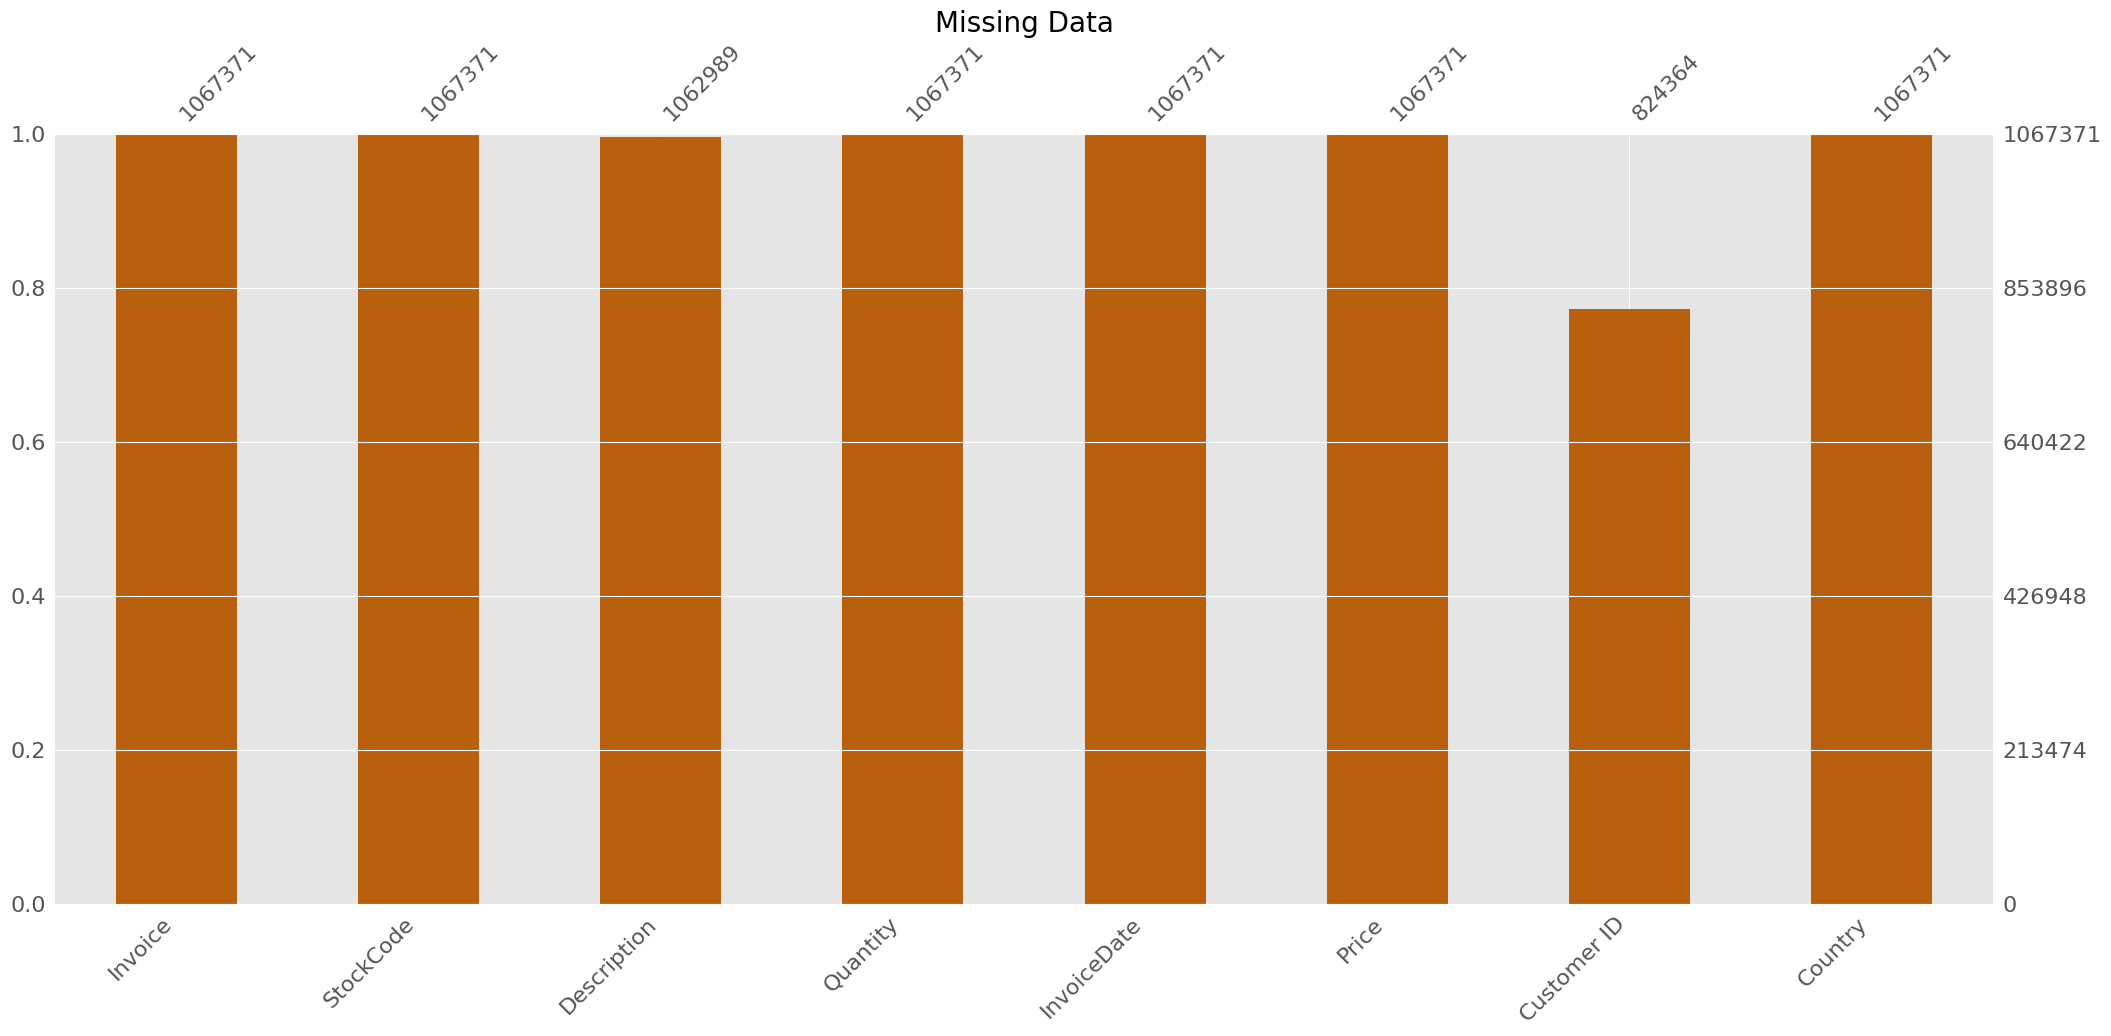

In [6]:
# Missing Data Visualization
msno.bar(data, color= "#B8600E")
plt.title('Missing Data', fontsize= 20)

In [7]:
# Numeric Features
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [8]:
# Categorical Features
data.drop(columns=['InvoiceDate'], axis=1).describe(include='O')

,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [9]:
# Cancelled Transactions
cancelled_transaction = data[data['Invoice'].str.startswith('C')]
print(cancelled_transaction.shape)
cancelled_transaction.head()

(19494, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [10]:
# let's check if there's another letter in the invoice other than the Cs
data['Invoice'] = data['Invoice'].astype('str')
data['Invoice'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
# we found another letter('A'), let's take a look
data[data['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


We'll filter the cancelled and the Adjusted bad debt rows during the data cleaning process 

In [12]:
# let's explore the Stockcode column
data['StockCode'] = data['StockCode'].astype('str')
data[data['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom
1067317,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


Found StockCode values that ends with a letter, I've got no clue what they really meant but it looks to be legit transactions. However, they are Codes that do not match our description, let's check them out

In [13]:

data['StockCode'] = data['StockCode'].astype('str')
data[(data['StockCode'].str.match('^\\d{5}$') == False)
     & (data['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


In [14]:
# Get the unique stockcodes
data['StockCode'] = data['StockCode'].astype('str')
data[(data['StockCode'].str.match('^\\d{5}$') == False)
     & (data['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [15]:
data[data['StockCode'].str.match('^POST$') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
1066677,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


**StockCode Summary**

| **Stockcode**  | **Description** | **Condition** |
|----------------|--------------------------|--------------------------|
| POST |                 Postage        |           Exclude      |
| D |               Discount       |          Exclude |
| DOT | Dotcom Postal | exclude
| M | Manual | Exclude |
| C2 | Carriage | Exclude
| BANK CHARGES | Bank Charges | Exclude
| DCGs | Every Stockcode beginning with DCGs | Exclude|
| Test(s) | Test products | Exclude |
| Gift(s)|Gift Voucher | Exclude
| ADJUST2 | Admin Adjustments | Exclude
| B | Bad Debt | Exclude
|PADS | Looks legit | include
| AMAZONFEE | Amazon Fee | Exclude
| CRUK | Cruk Commission | Exclude


# **Data Cleaning and Transformation**

In [16]:
# Make a copy of the original dataframe
cleaned_data = data.copy()
# Remove Duplicates
cleaned_data.drop_duplicates(inplace=True)

print(cleaned_data.shape)

(1033036, 8)


In [17]:
# filter rows with missing value in Customer ID
cleaned_data = cleaned_data[~cleaned_data['Customer ID'].isna()]
print(cleaned_data.shape)
cleaned_data.head()

(797885, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
cleaned_data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [19]:
# Filter out cancelled and bad debt invoice
cleaned_data = cleaned_data[cleaned_data['Invoice'].str.match('^\\d{6}$') ==True]
print(cleaned_data.shape)
cleaned_data.head()

(779495, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [20]:
# FIlter out odd Stockcodes

cleaned_data = cleaned_data[(cleaned_data['StockCode'].str.match('^\\d{5}$') == True)
                            |(cleaned_data['StockCode'].str.match('^\\d{5}[a-zA-Z]$') == True)
                            | (cleaned_data['StockCode'].str.match('^PADS$') == True)
                            | (cleaned_data['StockCode'].str.match('^POST$') == True)]
print(cleaned_data.shape)
cleaned_data.head()

(777424, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [21]:
# Statistics summary
cleaned_data.describe()

,Quantity,Price,Customer ID
count,777424.000000,777424.000000,777424.000000
mean,13.515695,2.992890,15320.445844
std,146.703251,10.420019,1695.773062
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15248.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,8142.750000,18287.000000


In [22]:
cleaned_data.describe(include='O')

,Invoice,StockCode,Description,InvoiceDate,Country
count,777424,777424,777424,777424,777424
unique,36707,4618,5269,34369,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,United Kingdom
freq,541,5023,5016,541,698795


In [23]:
# Convert InvoiceDate to datetime format
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777424 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      777424 non-null  object        
 1   StockCode    777424 non-null  object        
 2   Description  777424 non-null  object        
 3   Quantity     777424 non-null  int64         
 4   InvoiceDate  777424 non-null  datetime64[ns]
 5   Price        777424 non-null  float64       
 6   Customer ID  777424 non-null  float64       
 7   Country      777424 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.4+ MB


# **Feature Engineering**

In [24]:
# Lets create a Sales_Line Column from Price and Quantity columns
cleaned_data['Sales_Line'] = cleaned_data['Price'] * cleaned_data['Quantity']
cleaned_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales_Line
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


We'll aggregate the data using the RFM method to derive a customer-centric data, it's an acronym that stands for:

- __Recency (R):__ This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

    
- __Frequency (F):__ This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

    
- __Monetary (M):__ This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

In [25]:
# Aggregate the data by Customer ID to create our Recency, Frequency and MonetaryValue features

agg_df = cleaned_data.groupby('Customer ID', as_index=False).agg(
    Frequency= ('Invoice', 'nunique'),
    MonetaryValue = ('Price', 'sum'),
    InvoiceDate = ('InvoiceDate', 'max')
)
print(agg_df.shape)
agg_df.head()

(5854, 4)


,Customer ID,Frequency,MonetaryValue,InvoiceDate
0,12346.0,3,164.45,2011-01-18 10:01:00
1,12347.0,8,554.57,2011-12-07 15:52:00
2,12348.0,5,193.10,2011-09-25 13:13:00
3,12349.0,4,1480.44,2011-11-21 09:51:00
4,12350.0,1,65.30,2011-02-02 16:01:00


In [26]:
# Calculate and add the Recency Feature
max_date = agg_df['InvoiceDate'].max()

agg_df['Recency'] = (max_date - agg_df['InvoiceDate']).dt.days
agg_df.head()

,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
0,12346.0,3,164.45,2011-01-18 10:01:00,325
1,12347.0,8,554.57,2011-12-07 15:52:00,1
2,12348.0,5,193.10,2011-09-25 13:13:00,74
3,12349.0,4,1480.44,2011-11-21 09:51:00,18
4,12350.0,1,65.30,2011-02-02 16:01:00,309


In [27]:
agg_df.drop(columns='InvoiceDate', axis=1).describe()

,Customer ID,Frequency,MonetaryValue,Recency
count,5854.000000,5854.000000,5854.000000,5854.000000
mean,15318.896139,6.270413,397.462328,199.209942
std,1715.207646,12.786334,1028.179990,208.579070
min,12346.000000,1.000000,0.000000,0.000000
25%,13836.250000,1.000000,63.157500,24.000000
50%,15319.500000,3.000000,162.395000,94.000000
75%,16801.750000,7.000000,417.900000,378.000000
max,18287.000000,373.000000,37541.280000,738.000000


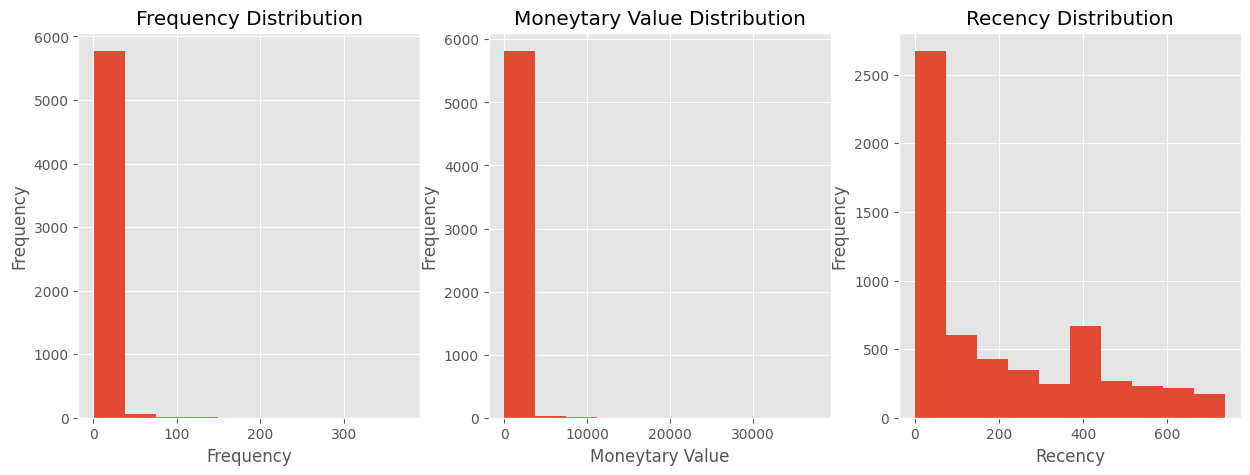

In [28]:
# Visualize the Distribution the data With Histogram
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(agg_df['Frequency'])
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(agg_df['MonetaryValue'])
plt.title('Moneytary Value Distribution')
plt.xlabel('Moneytary Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(agg_df['Recency'])
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

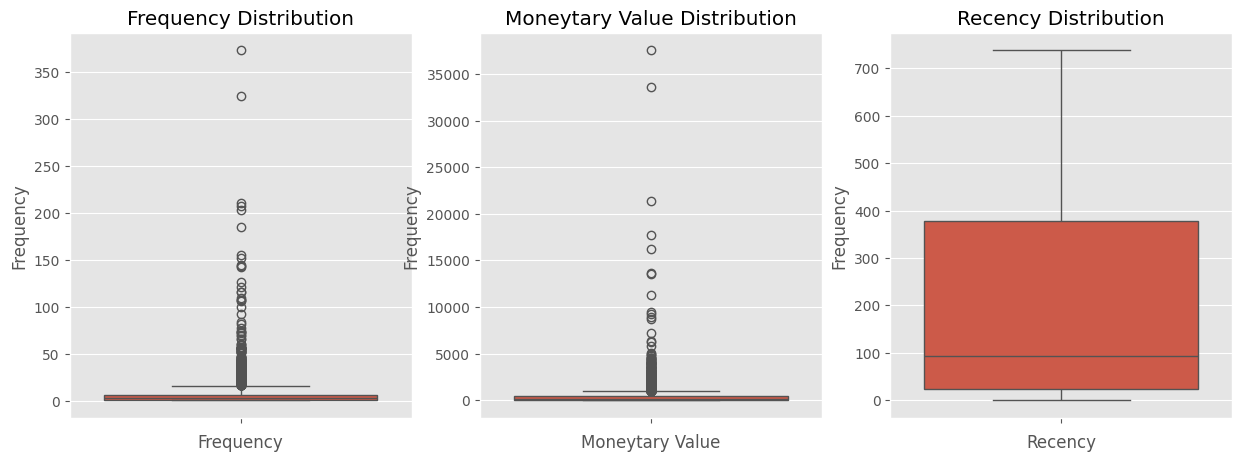

In [29]:
# Visualize the Distribution the data With Boxplot
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(agg_df['Frequency'])
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(agg_df['MonetaryValue'])
plt.title('Moneytary Value Distribution')
plt.xlabel('Moneytary Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(agg_df['Recency'])
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Filter out Outliers for Frequency Feature

# Extracting the quartiles
f1, f3 = agg_df['Frequency'].quantile([.25, .75])
# Extracting the IQR
f_iqr = f3 - f1
# Filter out Outliers for Frequency Feature
freq_outlier = agg_df[agg_df['Frequency'] > (f3 + 1.5 * f_iqr)]
print(freq_outlier.shape)
freq_outlier.head()

(425, 5)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
67,12415.0,25,2674.10,2011-11-15 14:22:00,23
69,12417.0,20,2012.31,2011-12-06 14:52:00,2
83,12431.0,27,1460.67,2011-11-04 11:55:00,35
89,12437.0,39,1898.38,2011-12-08 11:35:00,1
122,12471.0,75,4193.00,2011-12-07 15:43:00,1


In [31]:
# Filter out Outliers for MonetaryValue Feature

# Extracting the quartiles
m1, m3 = agg_df['MonetaryValue'].quantile([.25, .75])
# Extracting the IQR
m_iqr = m3 - m1
# Filter out Outliers for MonetaryValue Feature
money_outlier = agg_df[agg_df['MonetaryValue'] > (m3 + 1.5 * m_iqr)]
print(money_outlier.shape)
money_outlier.head()

(563, 5)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
3,12349.0,4,1480.44,2011-11-21 09:51:00,18
11,12357.0,3,1828.36,2011-11-06 16:07:00,32
13,12359.0,10,2676.50,2011-10-13 12:47:00,57
16,12362.0,11,1166.39,2011-12-06 15:40:00,2
32,12378.0,2,1017.41,2011-08-02 10:34:00,129


# **Data Preprocessing**

In [32]:
# Filter out the outlier dataframes from the data, we'll use that later

non_outlier_df = agg_df[(~agg_df.index.isin(freq_outlier.index))
                        & (~agg_df.index.isin(money_outlier.index))]
print(non_outlier_df.shape)
non_outlier_df.head()

(5166, 5)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
0,12346.0,3,164.45,2011-01-18 10:01:00,325
1,12347.0,8,554.57,2011-12-07 15:52:00,1
2,12348.0,5,193.10,2011-09-25 13:13:00,74
4,12350.0,1,65.30,2011-02-02 16:01:00,309
5,12351.0,1,49.46,2010-11-29 15:23:00,374


In [33]:
# Scale the Data

# instantiate the class
scaler= StandardScaler()

# Data scaling
scaled_data = scaler.fit_transform(non_outlier_df[['Recency', 'Frequency', 'MonetaryValue']])

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, index= non_outlier_df.index, columns=scaler.get_feature_names_out())

scaled_df.head()

,Recency,Frequency,MonetaryValue
0,0.496011,-0.212421,-0.205967
1,-1.036042,1.358840,1.666478
2,-0.690857,0.416083,-0.068457
4,0.420354,-0.840926,-0.681854
5,0.727710,-0.840926,-0.757880


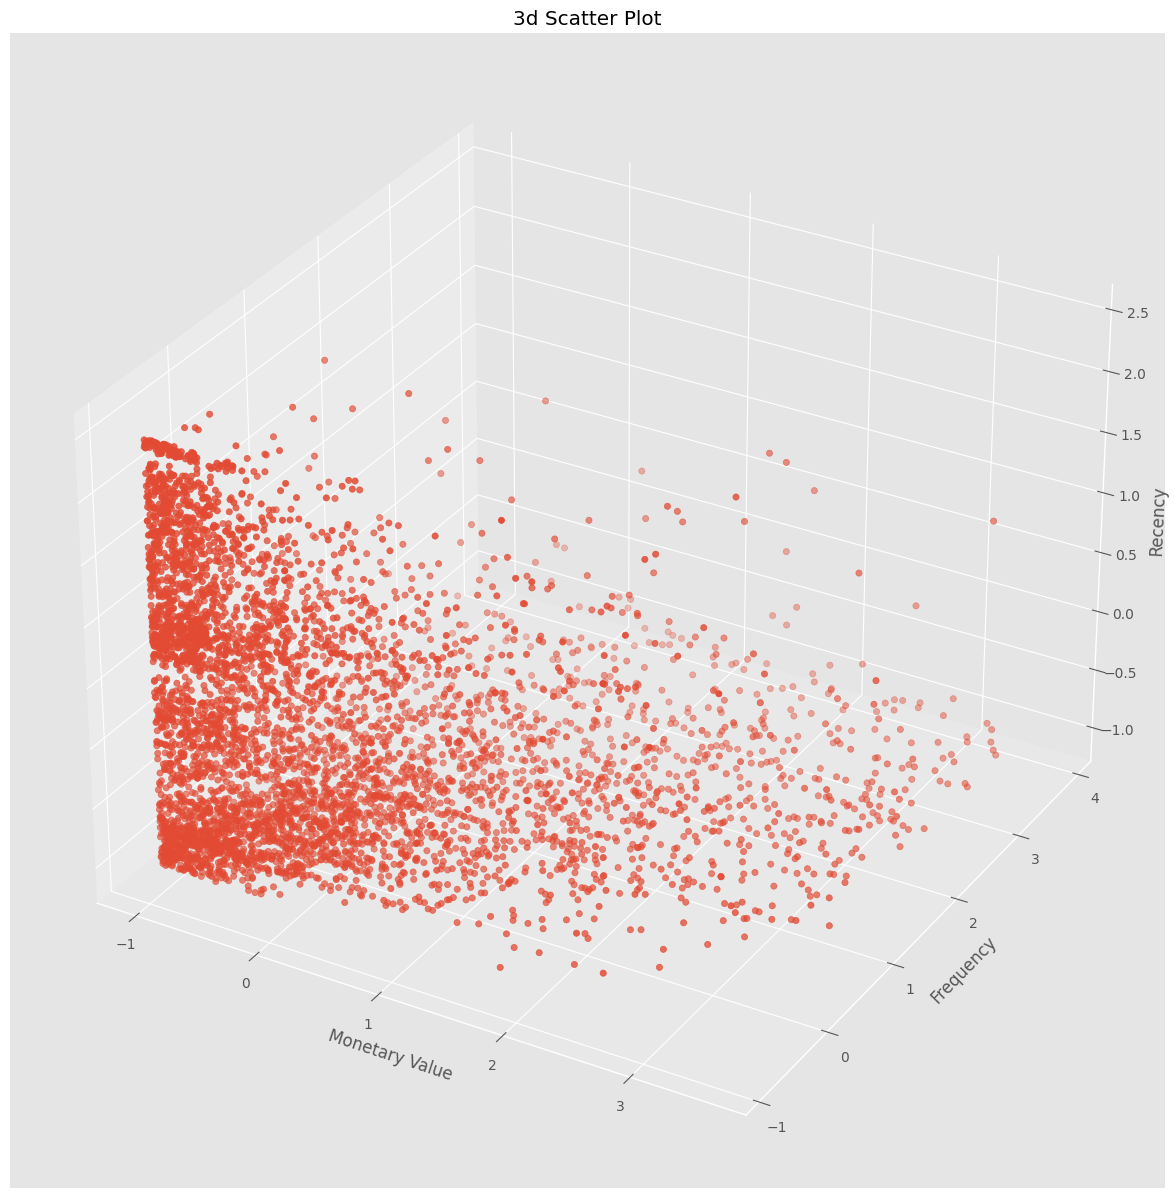

In [34]:
# Visualize the Features using a 3d plot

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(projection= '3d')
ax.scatter(scaled_df['MonetaryValue'], scaled_df['Frequency'], scaled_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3d Scatter Plot')

plt.show()

# **Customer Segmentation using K-Means Clustering**

In [35]:
k_values = range(2, 13)

inertia = []
sil_score = []
# Loop through different number of clusters to determine the best number of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    clusters = kmeans.fit_predict(scaled_df)

    score = silhouette_score(scaled_data, clusters)
    
    inertia.append(kmeans.inertia_)
    sil_score.append(score)

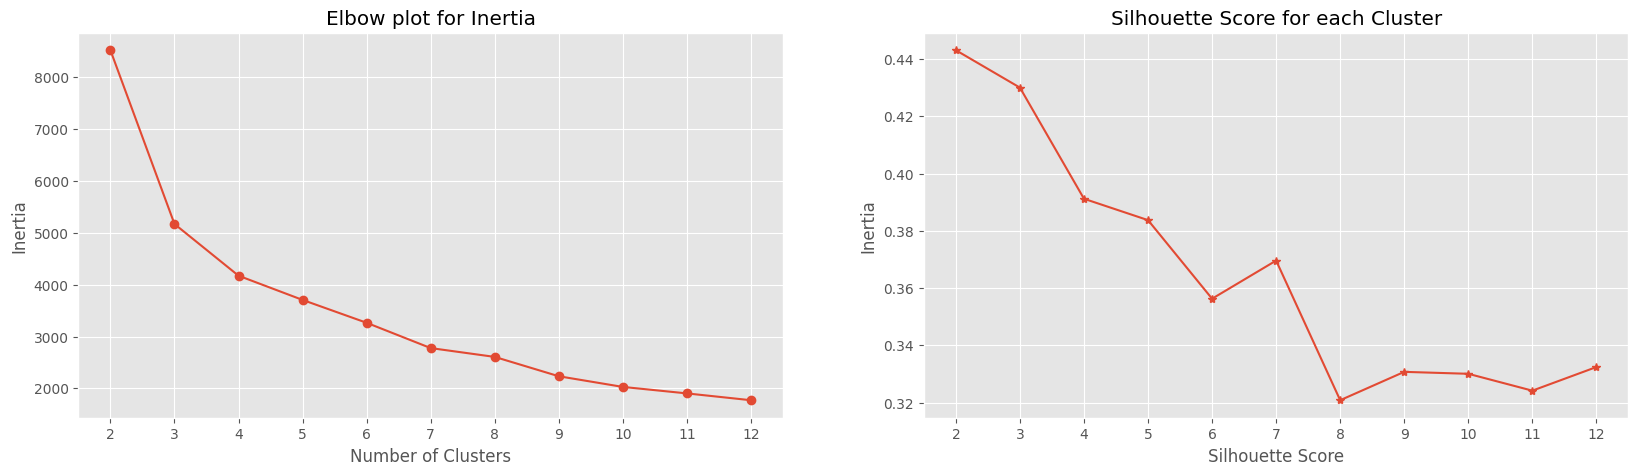

In [36]:
# Visualize the KMeans inertia and Silhouette score

plt.figure(figsize=(20, 5))
# Inertia
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker= 'o')
plt.title('Elbow plot for Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
#Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, sil_score, marker = '*')
plt.title('Silhouette Score for each Cluster')
plt.xlabel('Silhouette Score')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

In [37]:
# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
kmeans.fit_predict(scaled_data)

# Get the Labels
Clusters = kmeans.labels_
Clusters

array([0, 1, 2, ..., 0, 0, 1], shape=(5166,), dtype=int32)

In [38]:
# Append the label to the non_outlier_df
non_outlier_df['Clusters'] = Clusters
non_outlier_df.head()

,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency,Clusters
0,12346.0,3,164.45,2011-01-18 10:01:00,325,0
1,12347.0,8,554.57,2011-12-07 15:52:00,1,1
2,12348.0,5,193.10,2011-09-25 13:13:00,74,2
4,12350.0,1,65.30,2011-02-02 16:01:00,309,0
5,12351.0,1,49.46,2010-11-29 15:23:00,374,0


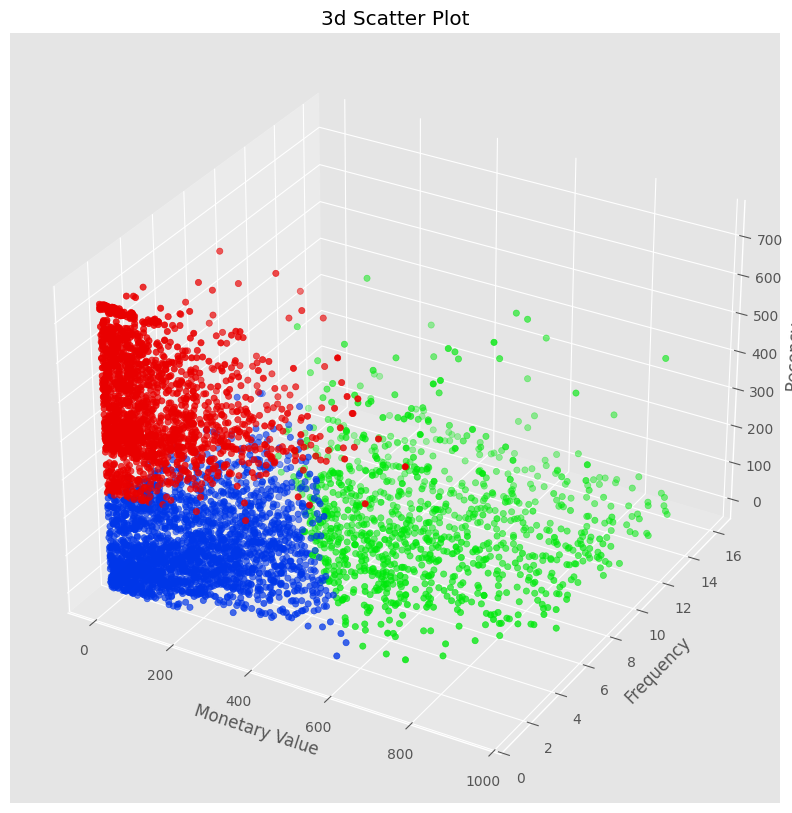

In [39]:
# Visualize the Clusters using 3d plot

colors = {
    0: "#E90000",
    1: "#00E90C",
    2: "#0036E9",
}
# Map the Colors to the cluster label
cluster_colors = non_outlier_df['Clusters'].map(colors)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection= '3d')
ax.scatter(non_outlier_df['MonetaryValue'],
           non_outlier_df['Frequency'], 
           non_outlier_df['Recency'],
           color = cluster_colors)
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3d Scatter Plot')

plt.show()

Text(0.5, 0, 'Monetary Value by Clusters')

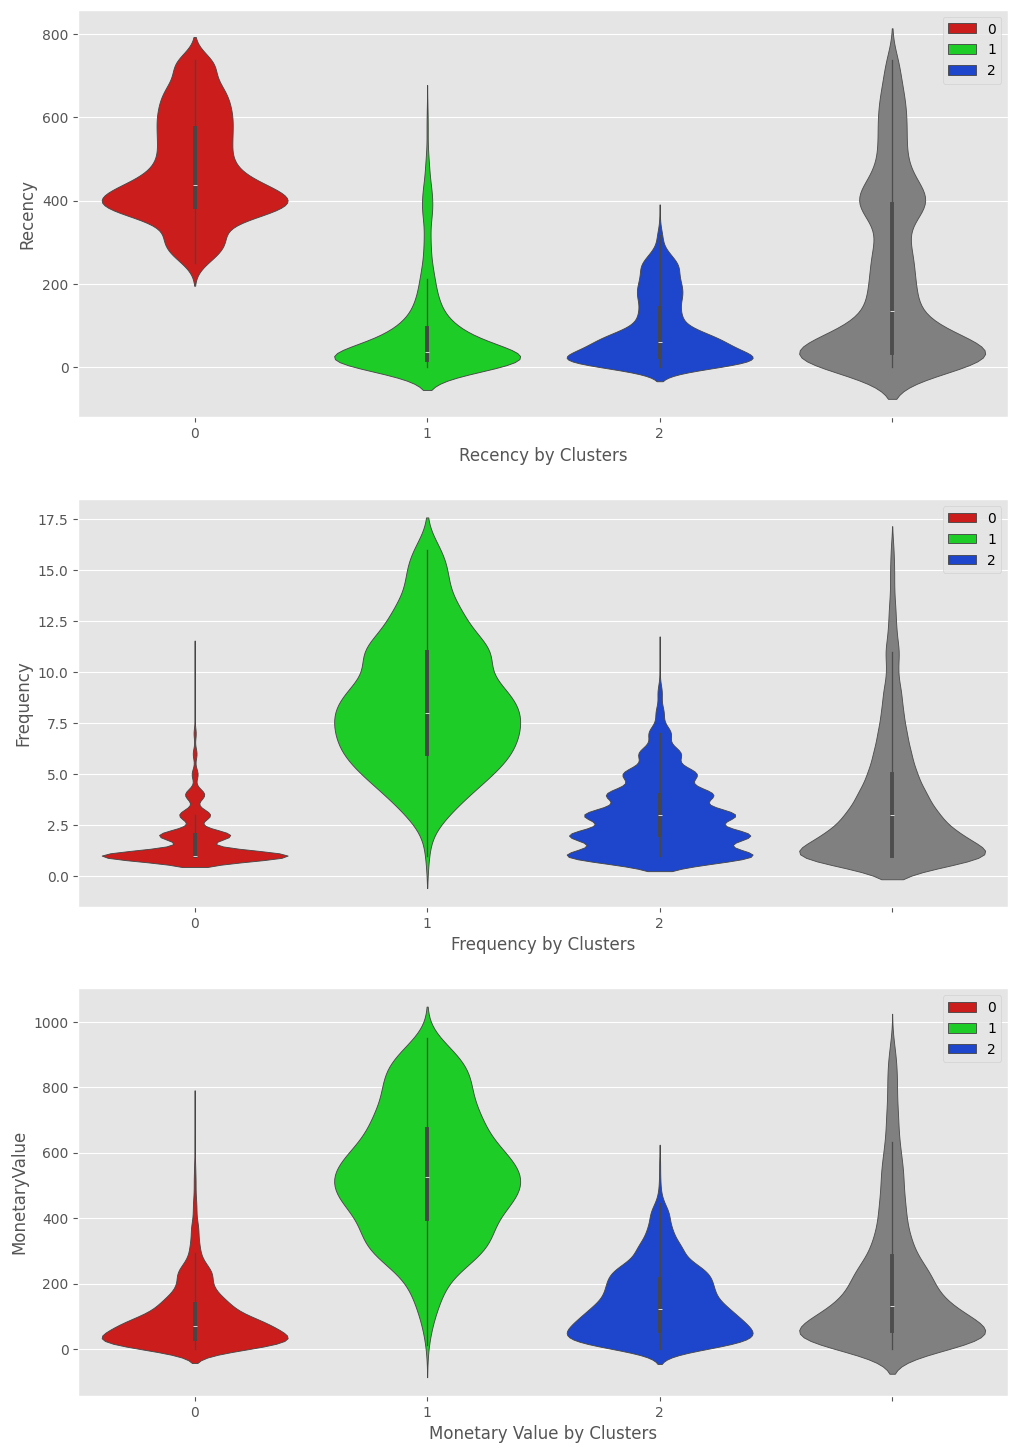

In [40]:
# Cluster Distribution Visualization using Violinplot
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outlier_df['Clusters'], y= non_outlier_df['Recency'], palette=colors, hue= non_outlier_df['Clusters'])
sns.violinplot(y=non_outlier_df['Recency'], color= 'gray')
plt.xlabel('Recency by Clusters')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outlier_df['Clusters'], y= non_outlier_df['Frequency'], palette=colors, hue= non_outlier_df['Clusters'])
sns.violinplot(y=non_outlier_df['Frequency'], color= 'gray')
plt.xlabel('Frequency by Clusters')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outlier_df['Clusters'], y= non_outlier_df['MonetaryValue'], palette=colors, hue= non_outlier_df['Clusters'])
sns.violinplot(y=non_outlier_df['MonetaryValue'], color= 'gray')
plt.xlabel('Monetary Value by Clusters')

**Cluster Analysis:**

- Cluster 0 (Red): High Recency, infrequent, relatively low-spending customers. These are likely customers who made a purchase long ago and haven't returned, and when they did purchase, it was for a low amount.

- Cluster 1 (Green): Low Recency, highly frequent, high-value customers. This is the most valuable segment – loyal, active, and high-spending customers

- Cluster 2 (Blue):Low Recency, infrequent, low-value customers. infrequent Could be new customers who haven't yet established a purchasing pattern, or one-time buyers.

**Key Actions**
- Cluster 0: Re-engage
- Cluster 1: Maintain
- Cluster 2: Nurture

In [41]:
# Outliers Clustering

# Extract the indices that appears of in both freq_outlier and money_outlier
freq_money_indices = freq_outlier.index.intersection(money_outlier.index)
freq_money_indices

Index([  67,   69,   83,   89,  122,  123,  125,  127,  141,  174,
       ...
       5684, 5738, 5789, 5791, 5792, 5795, 5797, 5811, 5826, 5849],
      dtype='int64', length=300)

In [42]:
# Filter out data that's in the indices above
freq_only_outlier = freq_outlier[~freq_outlier.index.isin(freq_money_indices)]
print(freq_only_outlier.shape)
freq_only_outlier.head()

(125, 5)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
133,12482.0,27,276.08,2010-05-12 16:51:00,575
134,12483.0,19,856.86,2011-11-22 17:02:00,16
151,12500.0,19,689.66,2011-11-16 16:20:00,22
175,12524.0,17,754.78,2011-11-30 15:31:00,8
249,12600.0,20,703.71,2011-11-11 10:29:00,28


In [43]:
# Filter out data that's in the indices above
money_only_outlier = money_outlier[(~money_outlier.index.isin(freq_money_indices))]
print(money_only_outlier.shape)
money_only_outlier.head()

(263, 5)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
3,12349.0,4,1480.44,2011-11-21 09:51:00,18
11,12357.0,3,1828.36,2011-11-06 16:07:00,32
13,12359.0,10,2676.50,2011-10-13 12:47:00,57
16,12362.0,11,1166.39,2011-12-06 15:40:00,2
32,12378.0,2,1017.41,2011-08-02 10:34:00,129


In [44]:
# Extract the data that's in both freq_outliers and money_outliers
freq_money_outlier = agg_df[agg_df.index.isin(freq_money_indices)]
print(freq_money_outlier.shape)
freq_money_outlier.head()

(300, 5)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency
67,12415.0,25,2674.10,2011-11-15 14:22:00,23
69,12417.0,20,2012.31,2011-12-06 14:52:00,2
83,12431.0,27,1460.67,2011-11-04 11:55:00,35
89,12437.0,39,1898.38,2011-12-08 11:35:00,1
122,12471.0,75,4193.00,2011-12-07 15:43:00,1


In [45]:
# Manually assign Cluster Labels to the Outliers and concatenate them
freq_only_outlier['Clusters'] = -1
money_only_outlier['Clusters'] = -2
freq_money_outlier['Clusters'] = -3

# Concat the three outlier dataframes together
outlier_df = pd.concat([freq_only_outlier, money_only_outlier,freq_money_outlier])
print(outlier_df.shape)
outlier_df.head()

(688, 6)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency,Clusters
133,12482.0,27,276.08,2010-05-12 16:51:00,575,-1
134,12483.0,19,856.86,2011-11-22 17:02:00,16,-1
151,12500.0,19,689.66,2011-11-16 16:20:00,22,-1
175,12524.0,17,754.78,2011-11-30 15:31:00,8,-1
249,12600.0,20,703.71,2011-11-11 10:29:00,28,-1


Text(0.5, 0, 'Monetary Value by Clusters')

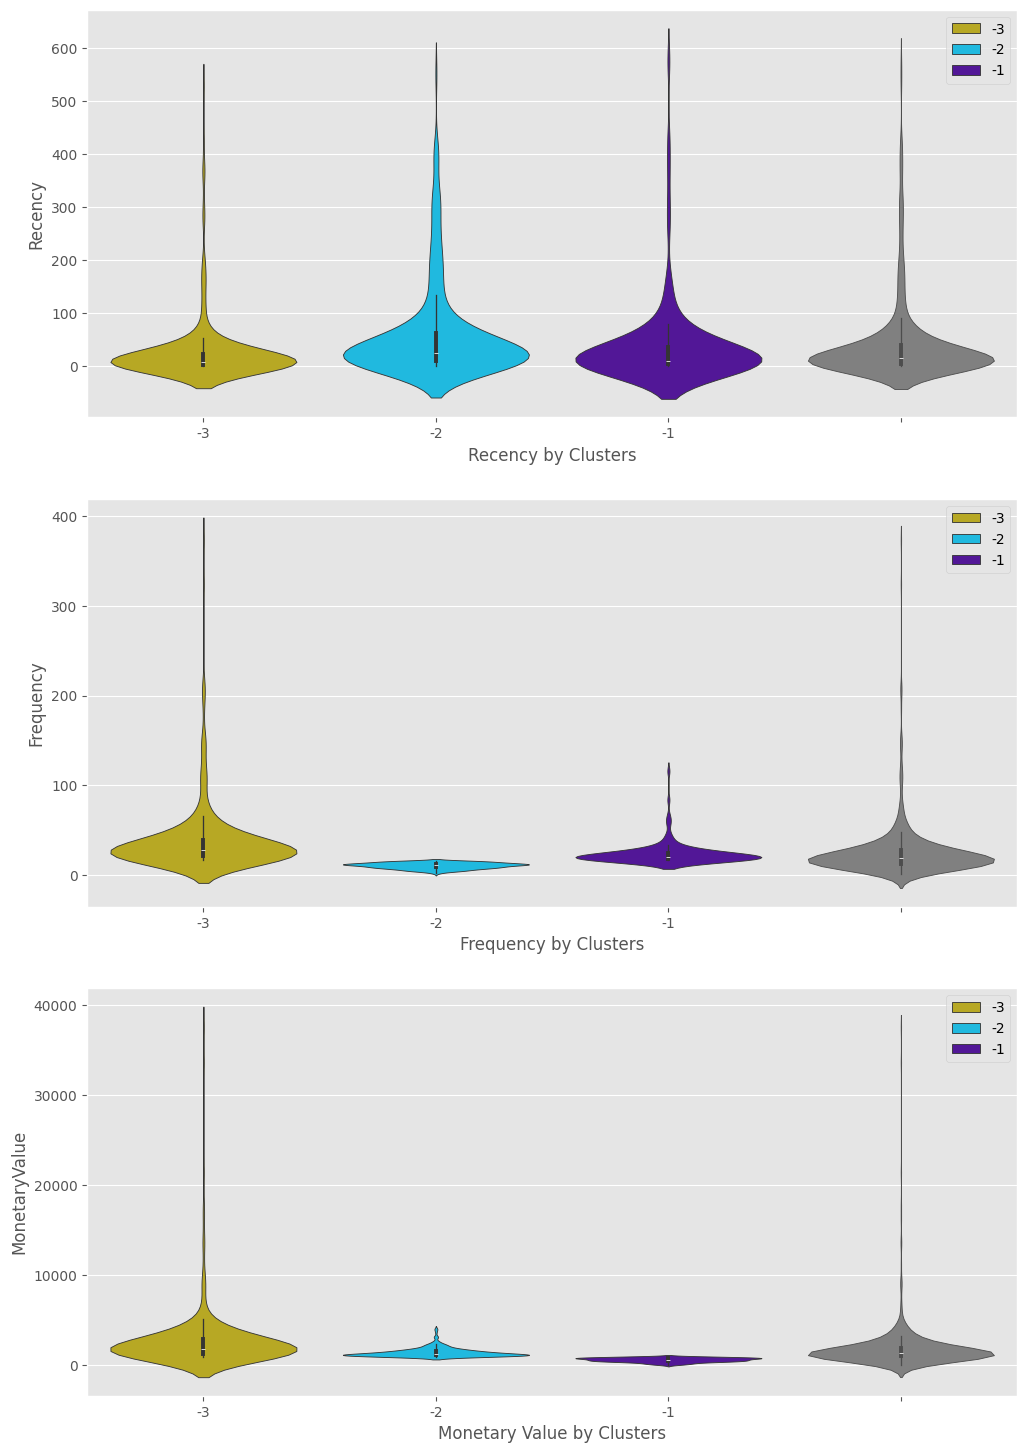

In [46]:
colors = {
    -1: "#5102AC",
    -2: "#00CCFF",
    -3: "#CFBC0C"
}

# Outlier Clusters Distribution Visualization using Violinplot
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_df['Clusters'], y= outlier_df['Recency'], palette=colors, hue= outlier_df['Clusters'])
sns.violinplot(y=outlier_df['Recency'], color= 'gray')
plt.xlabel('Recency by Clusters')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_df['Clusters'], y= outlier_df['Frequency'], palette=colors, hue= outlier_df['Clusters'])
sns.violinplot(y=outlier_df['Frequency'], color= 'gray')
plt.xlabel('Frequency by Clusters')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_df['Clusters'], y= outlier_df['MonetaryValue'], palette=colors, hue= outlier_df['Clusters'])
sns.violinplot(y=outlier_df['MonetaryValue'], color= 'gray')
plt.xlabel('Monetary Value by Clusters')

**Analysis on the Outlier Clusters**
- Cluster -1: Less recent, low-frequency, and low-value customers. This segment might consist of lapsed customers who also didn't spend much when they were active.

- Cluster -2: Moderately recent, very infrequent, and very low-value customers. These could be one-time, low-value buyers who haven't returned in a while.

- Cluster -3: Recent, diverse frequency (but with a strong low-frequency component), and high-value customers. This is a very important segment. While many might be infrequent, their large spending makes them valuable. There might be a mix of new high-value customers and some loyal, high-spending, but not extremely frequent, customers.

**Key Actions:**
- Cluster -1: Encourage
- Cluster -2: Upsell
- Cluster -3: VIPs

In [47]:
# Concatenate outlier_dfand non_outlier_df
full_cluster_df = pd.concat([non_outlier_df, outlier_df])
print(full_cluster_df.shape)
full_cluster_df.head()

(5854, 6)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency,Clusters
0,12346.0,3,164.45,2011-01-18 10:01:00,325,0
1,12347.0,8,554.57,2011-12-07 15:52:00,1,1
2,12348.0,5,193.10,2011-09-25 13:13:00,74,2
4,12350.0,1,65.30,2011-02-02 16:01:00,309,0
5,12351.0,1,49.46,2010-11-29 15:23:00,374,0


In [48]:
# Create Cluster labels for each cluster based on analysis
cluster_labels = {
    -3: 'VIPs',
    -2: 'Upsell',
    -1: 'Encourage',
    0: 'Re-engage',
    1: 'Maintain',
    2: 'Nurture'
}

# Assign Cluster labels to full_cluster_df
full_cluster_df['Cluster_Label'] = full_cluster_df['Clusters'].map(cluster_labels)
print(full_cluster_df.shape)
full_cluster_df.head()

(5854, 7)


,Customer ID,Frequency,MonetaryValue,InvoiceDate,Recency,Clusters,Cluster_Label
0,12346.0,3,164.45,2011-01-18 10:01:00,325,0,Re-engage
1,12347.0,8,554.57,2011-12-07 15:52:00,1,1,Maintain
2,12348.0,5,193.10,2011-09-25 13:13:00,74,2,Nurture
4,12350.0,1,65.30,2011-02-02 16:01:00,309,0,Re-engage
5,12351.0,1,49.46,2010-11-29 15:23:00,374,0,Re-engage


# **Cluster Analysis**

Text(0, 0.5, 'Average Value')

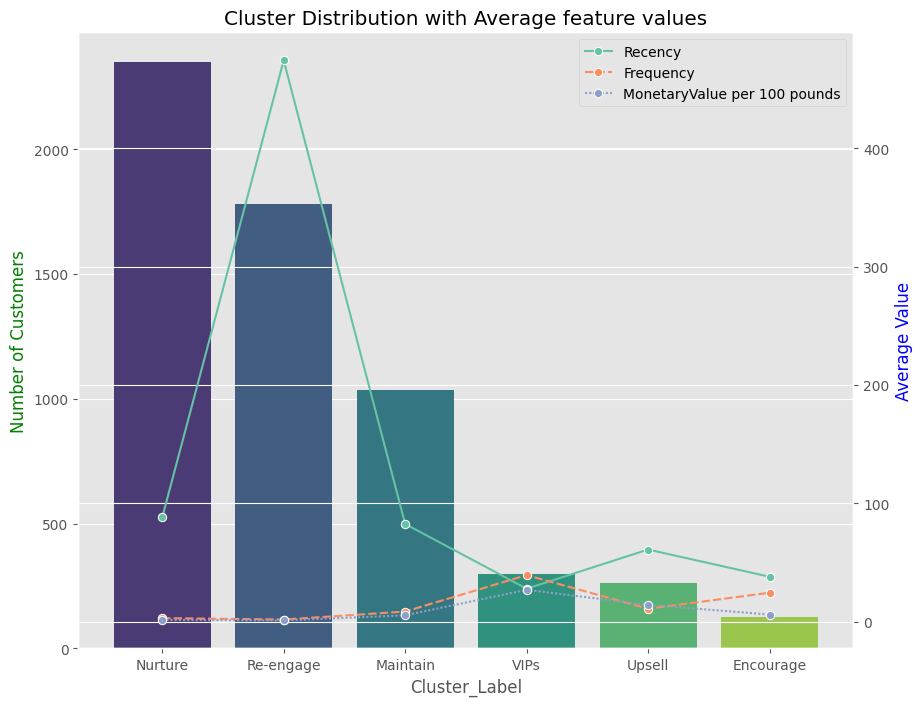

In [49]:
cluster_count = full_cluster_df['Cluster_Label'].value_counts()
# Scale down the MonetaryValue Feature down to per 100 for readability purpose
full_cluster_df['MonetaryValue per 100 pounds'] = full_cluster_df['MonetaryValue'] / 100
# The aveerage of each feature by their cluster label
feature_means = full_cluster_df.groupby('Cluster_Label')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Visualize the Clusters
fig, ax1 = plt.subplots(figsize = (10, 8))

sns.barplot(x= cluster_count.index, y=cluster_count.values, palette='viridis')
ax1.set_ylabel('Number of Customers', color= 'g')
ax1.set_title('Cluster Distribution with Average feature values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', markers='o')
ax2.set_ylabel('Average Value', color= 'b')

**Analysis**

Barplot (Number of Customers per Cluster)

- Nurture is the largest cluster, followed by Re-engage and Maintain. This means most customers are either recent/low-value (Nurture), lapsed (Re-engage), or moderately engaged (Nurture).
- VIPs, Upsell, and Encourage are much smaller groups, indicating fewer customers fall into these specialized segments.

Lineplot (Average Feature Values per Cluster)

- Recency (green line):
Highest for Re-engage (these customers haven’t purchased in a long time).
Lowest for VIPs and Encourage (these are your most recent customers).
- Frequency (orange line):
Highest for VIPs and Encourage (these customers buy most often).
Lowest for Re-engage and Nurture.
- MonetaryValue per 100 pounds (blue line):
Highest for VIPs and Encourage (these are your most valuable customers).
Moderate for Maintain and Upsell.
Lowest for Nurture and Re-engage.

**Summary and Business Implications:**

1. Nurture (Largest Cluster): Many customers, low frequency and monetary value, moderate recency.

- **Actions**: These are active but low-value customers. Focus on engagement strategies—personalized recommendations, loyalty programs, and incentives to increase purchase frequency and value.

2. Re-engage (Second Largest): Customers with high recency (haven’t purchased in a long time), low frequency and value.

- **Actions**: These are lapsed customers. Use win-back campaigns, special discounts, and targeted communications to bring them back.

3. Maintain: Recent customers, moderate frequency and value.

- **Actions**: These customers are engaged but not top spenders. Maintain their interest with regular updates, good service, and occasional offers to prevent churn.

4. VIPs (Smallest, Most Valuable): Very frequent, high-value, recent customers.

- **Actions**: These are your best customers. Prioritize retention—offer exclusive deals, early access to products, and personalized service to keep them loyal.

5. Upsell: Moderate recency, moderate frequency and value.

- **Actions**: These customers have potential to spend more. Target them with upselling and cross-selling strategies, bundle offers, or premium product suggestions.

6. Encourage: Least engaged, lowest value and frequency.

- **Actions**: May require aggressive introductory offers or may not be worth heavy investment. Test targeted campaigns to see if they can be activated.